***Task 3 - Sentiment Analysis using LSTM ***

Sentiment analysis is a common natural language processing (NLP) task that involves determining the sentiment or emotional tone behind a body of text. It is widely used in fields such as marketing, customer service, and social media monitoring to gauge public opinion and understand customer feedback.

In this task, you will implement a Long Short-Term Memory (LSTM) network, a type of recurrent neural network (RNN) that is particularly well-suited for analyzing sequential data, such as text. Using the IMDB movie reviews dataset, you will build a model to classify reviews as either positive or negative. This exercise will help you understand how LSTMs can capture the context and sequence of words in a text, making them powerful tools for tasks like sentiment analysis.

By the end of this task, you should be able to implement a basic LSTM model, preprocess text data, and evaluate the model's performance using metrics such as accuracy and F1-score. This hands-on experience will give you a deeper understanding of how deep learning models can be applied to real-world NLP problems.




In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import re

**The pd.read_csv()** function is used to read the CSV file. We specify the **engine='python'** to handle complex parsing scenarios, such as files with irregular delimiters or quotes. The **on_bad_lines='skip'** parameter ensures that any problematic rows in the CSV file (e.g., rows with formatting issues) are skipped instead of causing the program to crash. This helps in handling large and potentially messy datasets. After loading the data, the **df.dropna(inplace=True)** line removes any rows that contain missing values. This is important to ensure that the data fed into the model is complete and does not cause errors during processing.

In [2]:
# 1. Load and Preprocess the Dataset
def load_data(file_path):
    # Load the dataset (e.g., IMDB movie reviews dataset)
    df = pd.read_csv(file_path, engine='python', on_bad_lines='skip')  # Using 'python' engine and skipping bad lines
    df.dropna(inplace=True)  # Drop any rows with missing values
    return df['review'], df['sentiment']  # Assuming 'review' and 'sentiment' columns

The clean_text function is designed to clean and preprocess text data by removing unwanted characters, numbers, and symbols, ensuring that the text is ready for tokenization and further processing.

**re.sub(r"[^A-Za-z\s]", "", text)** removes any characters that are not letters (A-Z, a-z) or spaces. This includes punctuation, numbers, and special symbols.

**re.sub(r"\s+", " ", text)** replaces multiple spaces with a single space.

**.strip()** removes any leading or trailing spaces from the text.

This cleaning process ensures that the text is standardized, making it easier for the model to learn patterns without being confused by irrelevant characters or inconsistent spacing.

In [3]:
# Clean the text
def clean_text(text):
    # Remove unwanted characters, numbers, and symbols
    text = re.sub(r"[^A-Za-z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

**preprocess_text**  first cleans each review by removing unwanted characters using the clean_text function. Then, it initializes a Tokenizer to convert text into sequences of integers, where each integer represents a word. These sequences are padded to a uniform length (max_len) to ensure consistent input size for the model. Finally, it returns the padded sequences and the tokenizer for further use.

A **Tokenizer** in the context of text processing is a tool used to convert text data into a numerical format that machine learning models can understand.

In [4]:
# Tokenize and Pad Sequences
def preprocess_text(reviews, max_words=5000, max_len=200):
    reviews = [clean_text(review) for review in reviews]  # Clean the reviews
    tokenizer = Tokenizer(num_words=max_words)
    tokenizer.fit_on_texts(reviews)
    sequences = tokenizer.texts_to_sequences(reviews)
    padded_sequences = pad_sequences(sequences, maxlen=max_len)
    return padded_sequences, tokenizer



The encode_labels function converts 'positive' and 'negative' sentiment labels into 1s and 0s, respectively, for numerical processing. It then returns these labels as a NumPy array.

In [5]:
# Encode Sentiments
def encode_labels(sentiments):
    sentiments = sentiments.map({'positive': 1, 'negative': 0}).values
    return sentiments

In [6]:
# Load Data
file_path = 'IMDB Dataset.csv'  # <-- Provide the correct path to the dataset
reviews, sentiments = load_data(file_path)

In [7]:
# Preprocess Text Data
max_words = 5000  # Consider the top 5000 words
max_len = 200  # Pad or truncate reviews to 200 words
X, tokenizer = preprocess_text(reviews, max_words=max_words, max_len=max_len)

In [8]:
# Encode Sentiments (positive -> 1, negative -> 0)
y = encode_labels(sentiments)

# Split into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Sequential():** Initializes a linear stack of layers.
Embedding(input_dim=max_words, output_dim=128,

**input_length=max_len):** Converts integer sequences into dense vectors of fixed size (128) for each word. input_dim is the number of unique words considered, and input_length is the length of each sequence.

**Bidirectional(LSTM(units=64, return_sequences=False)):** Adds a Bidirectional LSTM layer with 64 units. This means the LSTM processes the input in both forward and backward directions to capture context from both ends of the sequence.

**Dense(1, activation='sigmoid'):** Adds a dense layer with a single output unit and a sigmoid activation function for binary classification (e.g., positive or negative sentiment).

***1.	Modify the output_dim in the Embedding layer and the units in the LSTM layers. Consider adding dropout for regularization.***

***2. Modify 'epochs' and 'batch_size' to see how they impact training time and model accuracy***

**IT WILL TAKE FEW MINUTES TO TRAIN THE MODEL.**

In [9]:
# 2. Define the LSTM Model
model = Sequential()

# Modify the embedding dimensions and experiment with LSTM configurations ---
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))  # <-- Modify 'output_dim'
model.add(Bidirectional(LSTM(units=64, return_sequences=False)))  # <-- Experiment with 'units' and add Dropout if necessary

model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 3. Train the Model
#  Modify 'epochs' and 'batch_size' to see how they impact training time and model accuracy ---
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)  # <-- Experiment with 'epochs' and 'batch_size'


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1228/1228 ━━━━━━━━━━━━━━━━━━━━ 332s 267ms/step - accuracy: 0.7278 - loss: 0.5231 - val_accuracy: 0.8610 - val_loss: 0.3362
Epoch 2/10
1228/1228 ━━━━━━━━━━━━━━━━━━━━ 320s 260ms/step - accuracy: 0.8873 - loss: 0.2787 - val_accuracy: 0.8887 - val_loss: 0.2769
Epoch 3/10
1228/1228 ━━━━━━━━━━━━━━━━━━━━ 320s 258ms/step - accuracy: 0.9120 - loss: 0.2247 - val_accuracy: 0.8863 - val_loss: 0.2996
Epoch 4/10
1228/1228 ━━━━━━━━━━━━━━━━━━━━ 322s 259ms/step - accuracy: 0.9180 - loss: 0.2105 - val_accuracy: 0.8793 - val_loss: 0.2955
Epoch 5/10
1228/1228 ━━━━━━━━━━━━━━━━━━━━ 326s 262ms/step - accuracy: 0.9428 - loss: 0.1522 - val_accuracy: 0.8822 - val_loss: 0.3149
Epoch 6/10
1228/1228 ━━━━━━━━━━━━━━━━━━━━ 321s 261ms/step - accuracy: 0.9564 - loss: 0.1214 - val_accuracy: 0.8812 - val_loss: 0.3662
Epoch 7/10
1228/1228 ━━━━━━━━━━━━━━━━━━━━ 320s 259ms/step - accuracy: 0.9653 - loss: 0.0983 - val_accuracy: 0.8717 - val_loss: 0.3919
Epoch 8/10
1228/1228 ━━━━━━━━━━━━━━━━━━━━ 323s 260ms/step - accuracy: 0.9

In [10]:
# 4. Evaluate the Model
y_pred = (model.predict(X_test) > 0.5).astype("int32")


307/307 ━━━━━━━━━━━━━━━━━━━━ 19s 62ms/step



The F1-score is a metric used to evaluate the performance of a classification model, particularly in cases where class imbalance exists. It combines two important metrics:

***Precision:***The proportion of true positive predictions out of all positive predictions made by the model. It measures how many of the predicted positives are actually true positives.


***Recall (Sensitivity):***The proportion of true positive predictions out of all actual positives. It measures how many of the actual positives were correctly identified by the model.


***The F1-score*** is the harmonic mean of precision and recall and is given by:


 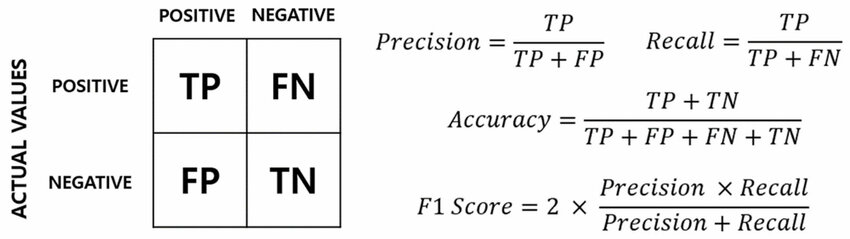





***3. Analyze the accuracy and F1-score. Consider modifying the model architecture or hyperparameters to improve performance***

In [11]:
# Calculate Accuracy and F1-Score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'F1-Score: {f1:.4f}')


#  Analyze the accuracy and F1-score. Consider modifying the model architecture or hyperparameters to improve performance ---

Accuracy: 0.8744
F1-Score: 0.8784


**Unidirectional LSTM**

Unidirectional LSTM processes input sequences in one direction, typically from past to future (left-to-right). It is suitable for tasks where future context does not influence the current prediction.

***Applications:***

Time-Series Prediction: Forecasting future values based on past data.
Sentiment Analysis: Determining the sentiment of a text based on previous words.

**Bidirectional LSTM**

Bidirectional LSTM processes input sequences in both directions (left-to-right and right-to-left). It captures context from both past and future, providing a more comprehensive understanding of the sequence.

***Applications:***

Machine Translation: Improving translation by considering both preceding and following words.
Named Entity Recognition: Identifying entities in text by understanding context from both directions.

**In the above exercise, we use the bidirectional LSTM model.**

1. Compare the performance of the bidirectional LSTM with a unidirectional LSTM using the same dataset. (You have to change the model to unidirectional)

2. Analyze the impact of each architecture on model accuracy and F1-score.

**You can use the same notebook and type your answers in a text cell.**


**UNIDIRECTIONAL**

In [12]:
# 2. Define the LSTM Model
model = Sequential()

# Modify the embedding dimensions and experiment with LSTM configurations ---
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))  # <-- Modify 'output_dim'
model.add(LSTM(units=64, return_sequences=False))  # <-- Experiment with 'units' and add Dropout if necessary

model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 3. Train the Model
#  Modify 'epochs' and 'batch_size' to see how they impact training time and model accuracy ---
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)  # <-- Experiment with 'epochs' and 'batch_size'


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1228/1228 ━━━━━━━━━━━━━━━━━━━━ 181s 145ms/step - accuracy: 0.7642 - loss: 0.4769 - val_accuracy: 0.8429 - val_loss: 0.3761
Epoch 2/10
1228/1228 ━━━━━━━━━━━━━━━━━━━━ 190s 135ms/step - accuracy: 0.8854 - loss: 0.2856 - val_accuracy: 0.8847 - val_loss: 0.2854
Epoch 3/10
1228/1228 ━━━━━━━━━━━━━━━━━━━━ 203s 136ms/step - accuracy: 0.9178 - loss: 0.2150 - val_accuracy: 0.8875 - val_loss: 0.2914
Epoch 4/10
1228/1228 ━━━━━━━━━━━━━━━━━━━━ 203s 137ms/step - accuracy: 0.9336 - loss: 0.1752 - val_accuracy: 0.8877 - val_loss: 0.3024
Epoch 5/10
1228/1228 ━━━━━━━━━━━━━━━━━━━━ 200s 135ms/step - accuracy: 0.9440 - loss: 0.1461 - val_accuracy: 0.8781 - val_loss: 0.3366
Epoch 6/10
1228/1228 ━━━━━━━━━━━━━━━━━━━━ 202s 135ms/step - accuracy: 0.9603 - loss: 0.1105 - val_accuracy: 0.8792 - val_loss: 0.3494
Epoch 7/10
1228/1228 ━━━━━━━━━━━━━━━━━━━━ 205s 138ms/step - accuracy: 0.9557 - loss: 0.1184 - val_accuracy: 0.8762 - val_loss: 0.3809
Epoch 8/10
1228/1228 ━━━━━━━━━━━━━━━━━━━━ 198s 135ms/step - accuracy: 0.9

In [13]:
# 4. Evaluate the Model
y_pred = (model.predict(X_test) > 0.5).astype("int32")


307/307 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step


In [14]:
# Calculate Accuracy and F1-Score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'F1-Score: {f1:.4f}')


#  Analyze the accuracy and F1-score. Consider modifying the model architecture or hyperparameters to improve performance ---

Accuracy: 0.8618
F1-Score: 0.8546


 Compare the performance of the bidirectional LSTM with a unidirectional LSTM using
the same dataset. (You have to change the model to unidirectional.) **bold text**

**Bidirectional**

Accuracy: 0.8744
F1-score: 0.8784

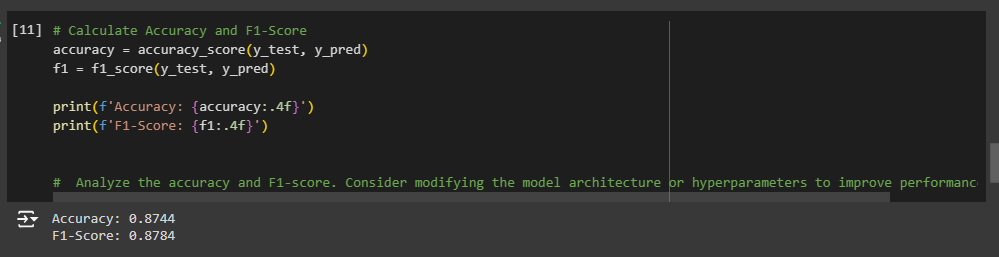






**Unidirectional**

Accuracy: 0.8618
F1-Score: 0.8546

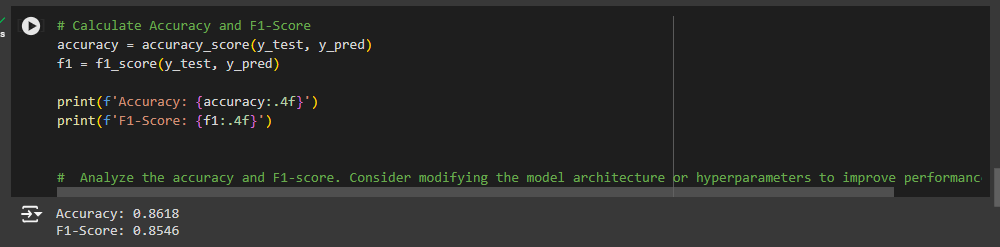

**Analyze the impact of each architecture on model accuracy and F1-score.**

**Bidirectional LSTM**

Accuracy: 0.8744
F1-Score: 0.8784

Interpretation: The bidirectional LSTM can capture information from both past and future contexts. This typically leads to a better understanding of the sequence data, which is reflected in the higher accuracy and F1-score.

**Unidirectional LSTM**

Accuracy: 0.8618
F1-Score: 0.8546

Interpretation: The unidirectional LSTM only captures information from the past context. While still effective, it may miss out on potential patterns that could be recognized by considering future context, leading to slightly lower performance metrics.

Conclusion

The bidirectional LSTM outperforms the unidirectional LSTM, particularly in tasks where context from both directions is essential. This suggests that for your application, where understanding the entire sequence context is vital, the bidirectional LSTM is the better choice.